In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
menu = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/menu.csv')

In [3]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

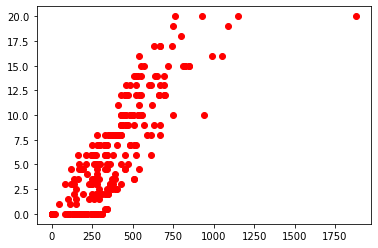

In [5]:
plt.plot(menu["Calories"],menu["Saturated Fat"],'ro')
plt.show()

## Using specific types of plots via pyplot

In addition to scatterplots, pyplot offers a number of other plot types.  These can be accessed via convenience functions such as ```scatter()```, ```hist()```, ```bar()```, ```barh()```, and ```pie()```, amongst others:

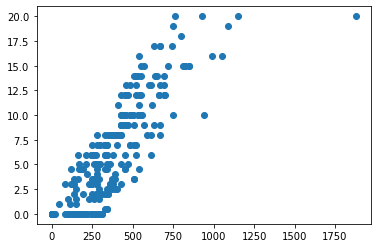

In [6]:
plt.scatter(menu["Calories"],menu["Saturated Fat"])
plt.show()

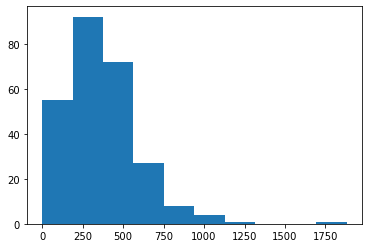

In [7]:
plt.hist(menu['Calories'])
plt.show()

## Pandas and matplotlib integration

Cumbersome?  Yes.  A better way?  Use the matplotlib integration from pandas:

matplotlib.axes._subplots.AxesSubplot

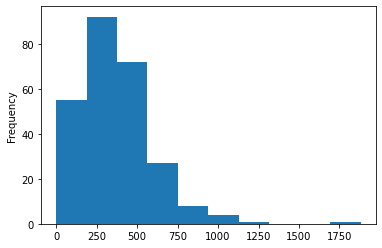

In [8]:
f = menu['Calories'].plot(kind='hist')
type(f)

In [9]:
type(f)

matplotlib.axes._subplots.AxesSubplot

Here are the valid values for "kind":

kind :   
    - 'line' : line plot (default)   
    - 'bar' : vertical bar plot   
    - 'barh' : horizontal bar plot   
    - 'hist' : histogram   
    - 'box' : boxplot    
    - 'kde' : Kernel Density Estimation plot   
    - 'density' : same as 'kde'  
    - 'area' : area plot   
    - 'pie' : pie plot   

## Bar plots with groupby()

In [13]:
categories = menu.groupby('Category').size()

In [14]:
categories

Category
Beef & Pork           15
Beverages             27
Breakfast             42
Chicken & Fish        27
Coffee & Tea          95
Desserts               7
Salads                 6
Smoothies & Shakes    28
Snacks & Sides        13
dtype: int64

<AxesSubplot:ylabel='Category'>

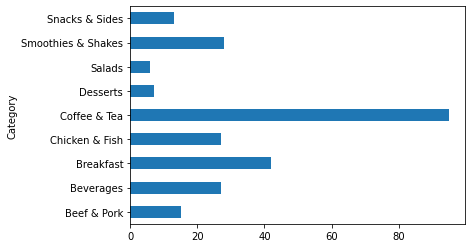

In [17]:
# df.plot(kind="")
categories.plot(kind='barh')

In [18]:
categories_sorted = categories.sort_values(ascending=True)

<AxesSubplot:ylabel='Category'>

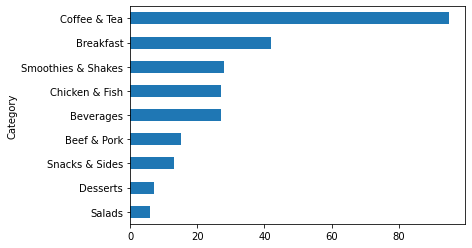

In [19]:
categories_sorted.plot(kind='barh')

### <font color="magenta">Q3: Create a new column in the menu DataFrame called "Sugary" whose value is 1 if the values of "Sugars" is greater than 20, otherwise set it to 0. 

    Hint: use np.where(...)

In [20]:
menu['Sugary'] = np.where(menu['Sugars'] > 20, 1 , 0)

## Create a stacked bar plot by using a 2-level groupby() followed by an unstack():

<AxesSubplot:xlabel='Category'>

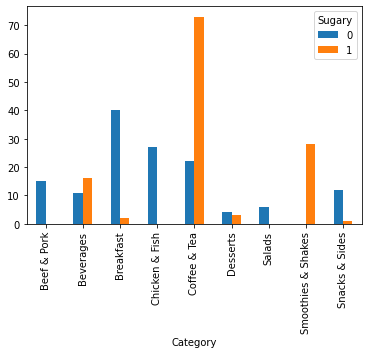

In [26]:
# groupby 2 and plot them size
menu.groupby(["Category","Sugary"]).size().unstack().plot(kind = "bar")

<AxesSubplot:xlabel='Category'>

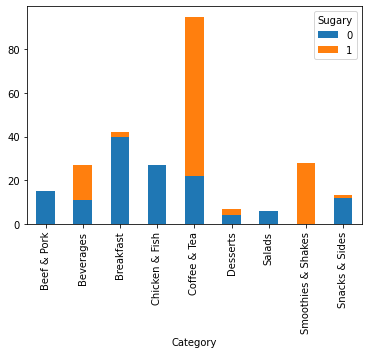

In [27]:
menu.groupby(["Category","Sugary"]).size().unstack().plot(kind = "bar", stacked = True)

<AxesSubplot:xlabel='Category'>

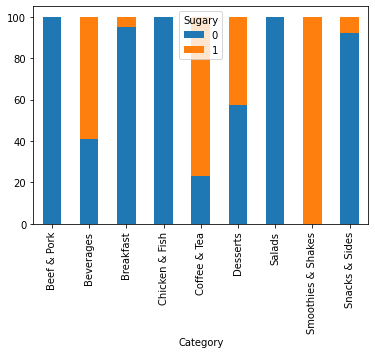

In [29]:
menu.groupby(['Category','Sugary']).size().groupby(by='Category').apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True) # by 'Category' groupby and then calculate 100% number

### Pie Charts

There are many issues with pie charts, and the one below is a good example of what not to do, but everyone wants to know how to make them:

<AxesSubplot:title={'center':'Menu Categories'}, ylabel='None'>

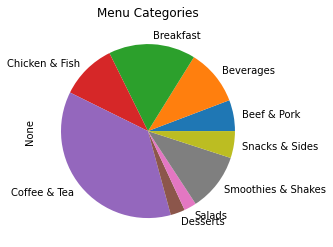

In [31]:
categories.plot(kind='pie',title='Menu Categories')

## Subplots (again)

In addition to the way we used subplots in the previous class, we can use the ```.subplots()``` function to generate mulitple plots within a figure.  ```subplots()``` returns a set of axes on which we can make plots.

To demonstrate how this works, let's fill in just one of the subplots:


In [32]:
# subplots() returns a set of axes on which we can make plots.

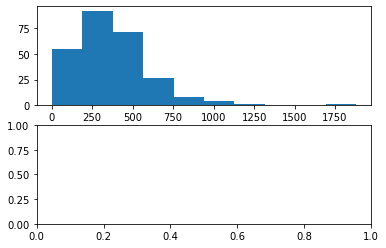

In [33]:
f, (ax1, ax2) = plt.subplots(2) # if only 1 argument, we assume it's the number of rows
ax1.hist(menu['Calories'])
plt.show()

Now let's fill in both subplots:

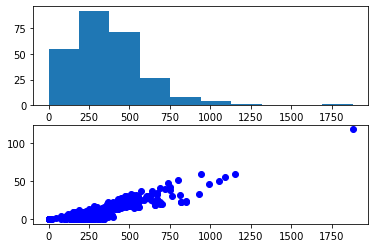

In [34]:
f, (ax1, ax2) = plt.subplots(2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

Now let's make a 2x2 layout of 4 plots.  Note the structure of the return values from the subplots function:

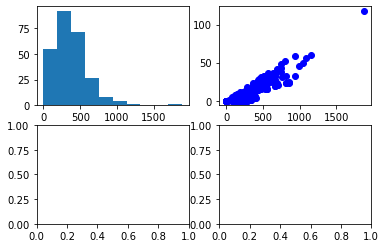

In [35]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

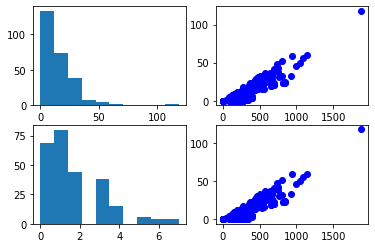

In [36]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Total Fat'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
ax3.hist(menu['Dietary Fiber'])
ax4.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

Alternatively, we can use the pandas-matplotlib integration.  Note the use of the ```ax=``` keyword arg.

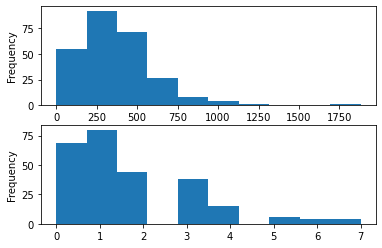

In [38]:
# pandas-matplotlib integration： .plot(ax=ax1, kind='hist')
f, (ax1, ax2) = plt.subplots(2)
menu['Calories'].plot(ax=ax1, kind='hist')
menu['Dietary Fiber'].plot(ax = ax2,kind='hist')
plt.show()

### xkcd style plots (just for fun)

Note that we can scope the use of any ```plt.``` function by using a ```with``` statement.

Note also that we can save a figure as a file by using ```savefig(...)``` (as shown below).

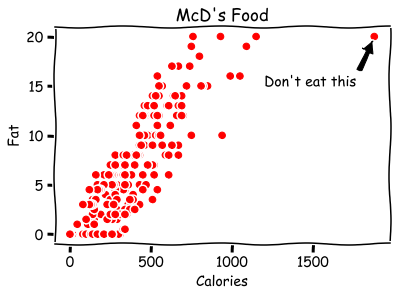

In [40]:
with plt.xkcd(): #scope the use of any plt. function by using a with statement.
    
        # This figure will be in XKCD-style
        
        
        plt.plot(menu["Calories"],menu["Saturated Fat"],'ro')
        plt.title("McD's Food")
        plt.xlabel('Calories')
        plt.ylabel('Fat')
        plt.annotate("Don't eat this",xytext=(1200,15),xy=(1880,20),arrowprops=dict(facecolor='black', shrink=0.1))
        
        # savefig
        plt.savefig('xkcd.png',format='png') # alternatively, we could save as a pdf, svg, ps, or eps
        # show
        plt.show()